In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fast')

## Data Collection
Get the up to date data for Covid-19 in the province of Ontario

In [2]:
import urllib.request
import json

url = 'https://data.ontario.ca/api/3/action/datastore_search?resource_id=455fd63b-603d-4608-8216-7d8647f43350&limit=750000'  

with urllib.request.urlopen(url) as url:
    result = json.loads(url.read())
    data = result['result']['records']

print("number of data points:", len(data))

number of data points: 556435


If needed, get the data from a local csv...
```python
import csv
with open('./data/conposcovidloc.csv', 'r') as fh:
    data = [l for l in csv.DictReader(fh)]
```

## Ontario Data Interpretation
Interpret the data for the entire province of Ontario.

In [3]:
fatalities = dict()
case_count = dict()

fatalities['total'] = 0
case_count['total'] = 0

for case in data:
    age_group = case['Age_Group']
    if case['Outcome1'] == 'Fatal':
        fatalities['total'] += 1
        if age_group in fatalities.keys():
            fatalities[age_group] += 1
        else:
            fatalities[age_group] = 1
    if age_group in case_count.keys():
        case_count[age_group] += 1
    else:
        case_count[age_group] = 1
    case_count['total'] += 1

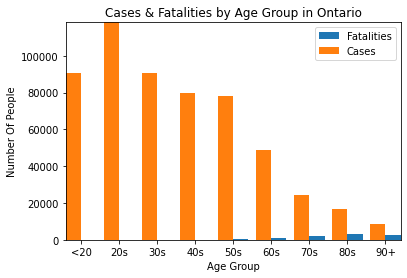

In [4]:
# Build a graph from the interpretted Ontario data
ages = sorted(case_count.keys())[:-2]
ages = [ages[-1]] + ages[:-1]
x = np.arange(len(ages))  # the label locations

ax = plt.subplot()
w = 0.4 # bar width
ax.bar(x+(w/2), [fatalities[d] for d in ages], width=w, align='center', label='Fatalities')
ax.bar(x-(w/2), [case_count[d] for d in ages], width=w, align='center', label='Cases')

ax.set_ylabel('Number Of People')
ax.set_xlabel('Age Group')
ax.set_title('Cases & Fatalities by Age Group in Ontario')
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(ages)
ax.autoscale(tight=True)

plt.show()

In [5]:
print("Fatality % By Age Group in Ontario")
print()
for k in ages:
    print(k, fatalities[k], '/', case_count[k], '=', fatalities[k]/case_count[k]*100, "%")
print("ttl", fatalities['total'], '/', case_count['total'], '=', fatalities['total']/case_count['total']*100, "%")

Fatality % By Age Group in Ontario

<20 5 / 90493 = 0.0055252892488921795 %
20s 28 / 118215 = 0.023685657488474388 %
30s 62 / 90904 = 0.06820381941388717 %
40s 149 / 79635 = 0.1871036604508068 %
50s 468 / 78389 = 0.5970225414280065 %
60s 1105 / 49020 = 2.2541819665442677 %
70s 1941 / 24392 = 7.957527058051821 %
80s 3191 / 16628 = 19.19052201106567 %
90+ 2478 / 8660 = 28.61431870669746 %
ttl 9428 / 556435 = 1.6943578315526522 %


## Hamilton Data Interpretation
Interpret the data for the Hamilton Public Health Unit

In [6]:
hamilton = [r for r in data if r['Reporting_PHU'] == 'Hamilton Public Health Services']

hamilton_fatalities = dict()
hamilton_case_count = dict()

hamilton_fatalities['total'] = 0
hamilton_case_count['total'] = 0

for case in hamilton:
    age_group = case['Age_Group']
    if case['Outcome1'] == 'Fatal':
        hamilton_fatalities['total'] += 1
        if age_group in hamilton_fatalities.keys():
            hamilton_fatalities[age_group] += 1
        else:
            hamilton_fatalities[age_group] = 1
    if age_group in hamilton_case_count.keys():
        hamilton_case_count[age_group] += 1
    else:
        hamilton_case_count[age_group] = 1
    hamilton_case_count['total'] += 1

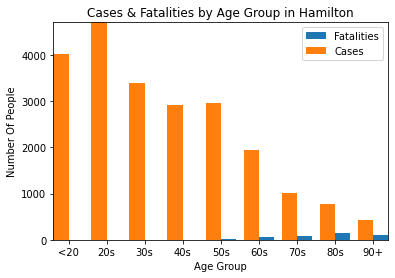

In [7]:
# Build a graph from the interpretted Ontario data
ages = sorted(case_count.keys())[:-2]
ages = [ages[-1]] + ages[:-1]
x = np.arange(len(ages))  # the label locations

ax = plt.subplot()
w = 0.4 # bar width
ax.bar(x+(w/2), [hamilton_fatalities[d] if d in hamilton_fatalities else 0 for d in ages], width=w, align='center', label='Fatalities')
ax.bar(x-(w/2), [hamilton_case_count[d] for d in ages], width=w, align='center', label='Cases')

ax.set_ylabel('Number Of People')
ax.set_xlabel('Age Group')
ax.set_title('Cases & Fatalities by Age Group in Hamilton')
ax.legend()

ax.set_xticks(x)
ax.set_xticklabels(ages)
ax.autoscale(tight=True)

plt.show()

In [8]:
print("Fatality % By Age Group in Hamilton")
print()
for k in ages:
    if k in hamilton_fatalities:
        fatals = hamilton_fatalities[k]
    else:
        fatals = 0
    print(k, fatals, '/', hamilton_case_count[k], '=', fatals/hamilton_case_count[k]*100, "%")
print("ttl", hamilton_fatalities['total'], '/', hamilton_case_count['total'], '=', hamilton_fatalities['total']/hamilton_case_count['total']*100, "%")

Fatality % By Age Group in Hamilton

<20 0 / 4009 = 0.0 %
20s 0 / 4703 = 0.0 %
30s 3 / 3393 = 0.08841732979664013 %
40s 3 / 2918 = 0.1028101439342015 %
50s 12 / 2953 = 0.4063664070436844 %
60s 52 / 1952 = 2.663934426229508 %
70s 81 / 1015 = 7.980295566502463 %
80s 142 / 775 = 18.322580645161292 %
90+ 111 / 428 = 25.934579439252335 %
ttl 404 / 22146 = 1.8242572022035584 %
